# Best Fit Line for a very large DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
x_data=np.linspace(0.0,10.0,1000000)
noise=np.random.randn(len(x_data))
y_data=0.5*x_data+5+noise

### Here I have created a very large dataset of 1 million samples and added a little noise to it. We have created a y=0.5x+5 line with noise

In [6]:
x_df=pd.DataFrame(data=x_data,columns=['X Data'])
y_df=pd.DataFrame(data=y_data,columns=['Y Data'])
my_data=pd.concat([x_df,y_df],axis=1)

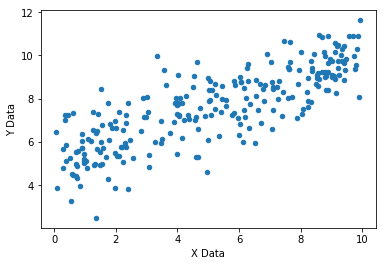

In [7]:
my_data.sample(250).plot(kind='scatter',x='X Data', y='Y Data')

In [8]:
batch_size=8
rand=np.random.randn(2)
m=tf.Variable(rand[0])
b=tf.Variable(rand[1])

In [10]:
xph=tf.placeholder(tf.float64,batch_size)
yph=tf.placeholder(tf.float64,batch_size)

In [11]:
y_model=m*xph+b
error=tf.reduce_sum(tf.square(y_model-yph))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [12]:
init=tf.global_variables_initializer()

In [29]:
with tf.Session() as sess:
    sess.run(init)
    batches=5000
    for i in range(batches):
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        feed={xph:x_data[rand_ind],yph:y_data[rand_ind]}
        sess.run(train,feed_dict=feed)
    m_pred,b_pred=sess.run([m,b])

#### Vary the batches to predict a good result. Here 5000 gave a better result as compared to others.

In [33]:
m_pred

0.4969017101570014

In [34]:
b_pred

5.005837737190699

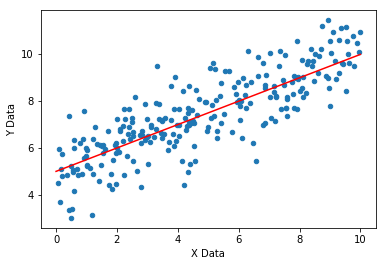

In [35]:
y_pred=m_pred*x_data+b_pred
my_data.sample(250).plot(kind='scatter',x='X Data', y='Y Data')
plt.plot(x_data,y_pred,c='red')